# Rhob

импортируем библиотеки, читаем файлы 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
col_names=['A']

In [3]:
rhob_10= pd.read_csv('rhob_10.csv',header=None, names=col_names, sep=';')
rhob_30= pd.read_csv('rhob_30.csv',header=None, names=col_names, sep=';')
rhob_50= pd.read_csv('rhob_50.csv',header=None, names=col_names, sep=';')

In [4]:
rhob_10

,A
0,2.477074
1,2.444147
2,2.450956
3,2.459021
4,2.367382
...,...
95,2.220649
96,1.952639
97,1.810154
98,1.923319


In [5]:
rhob_30

,A
0,2.505510
1,2.555706
2,2.577834
3,2.506142
4,2.464319
...,...
95,1.941149
96,1.968806
97,2.045771
98,2.037665


In [6]:
rhob_50

,A
0,2.511982
1,2.512468
2,2.492285
3,2.523510
4,2.463340
...,...
95,1.981499
96,2.006016
97,1.990282
98,2.017143


сортируем все значения плотности для дальнейшей кластеризации

In [133]:
rhob_10_sort=sorted(rhob_10['A'])
rhob_30_sort=sorted(rhob_30['A'])
rhob_50_sort=sorted(rhob_50['A'])

сначала рассмотрим rhob_10

### rhob_10 

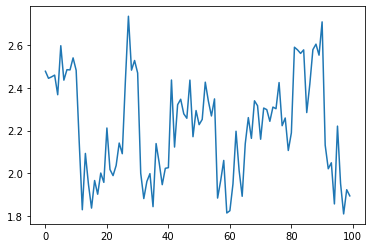

In [165]:
 plt.plot(rhob_10['A'])

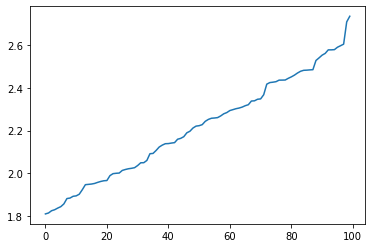

In [166]:
plt.plot(rhob_10_sort)

Для удобства поместим отсортированные значения в переменную X и выполним метод локтя для определения оптимального кол-ва кластеров

In [156]:
X=pd.DataFrame(rhob_10_sort)

Text(0, 0.5, 'WCSS')

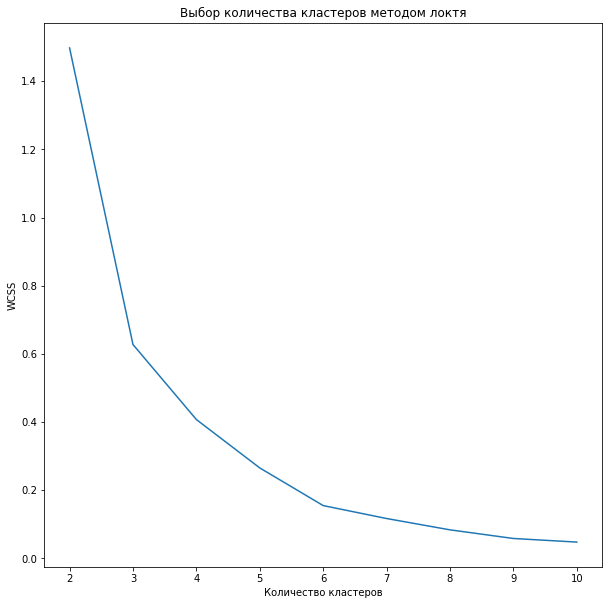

In [158]:
wcss = []
 
for i in range(2, 11):
    

    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)

    kmeans.fit(X)
 

    wcss.append(kmeans.inertia_)

plt.figure(figsize = (10,10))

plt.plot(range(2, 11), wcss)

plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')

Я пробовал кластеризовать по разному количеству, но результат не впечатлил :(
ПО сути, при >=6 кластерах график ошибки wss убывает медленнее, поэтому берём это число

[[2.45217624]
 [1.99691727]
 [2.15947519]
 [1.86126678]
 [2.59537332]
 [2.29924051]]


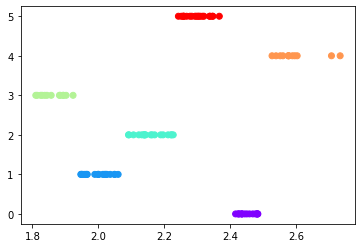

In [159]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_pred = kmeans.fit_predict(X)
print(kmeans.cluster_centers_)
plt.scatter( X[:],y_pred, c=kmeans.labels_, cmap='rainbow')


Теперь построим график, состоящий из кусочно-постоянных функций. Из-за единичных вылетов образуются локальные пики

Text(0, 0.5, 'Центры класстеров')

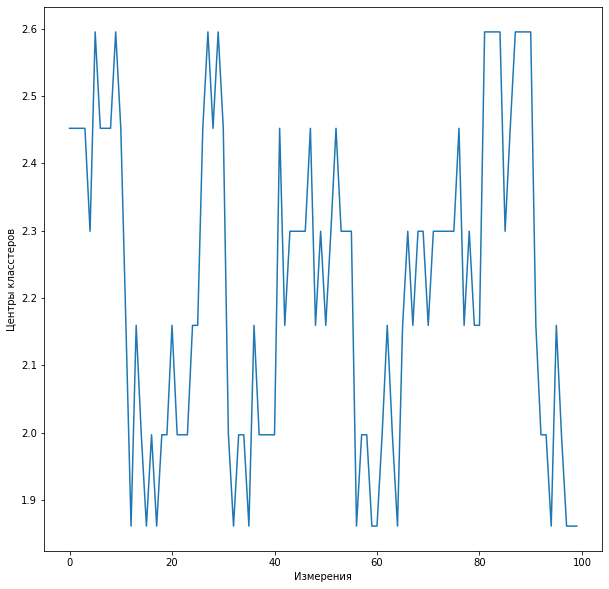

In [162]:
M=rhob_10['A']
def L_clust(x,y):
    z=[]
    for i in y:
        z.append(abs(abs(x)-abs(i)))
    f=z.index(min(z))
    return y[f]
S=[]
K=kmeans.cluster_centers_  
for i in M:
    S.append(L_clust(i,K))
#print(S)
plt.figure(figsize=(10,10))
plt.plot(S)
plt.xlabel("Измерения")
plt.ylabel("Центры класстеров")

Т.Е. я брал значения на графике, смотрел расстояние до ближайшего центроида и заменял конкретное значение плотности на значение этого центроида

In [155]:
kmeans.score(X)

-0.1550972212394572

Для двух других измерений результат выглядит лучше

### rhob_30

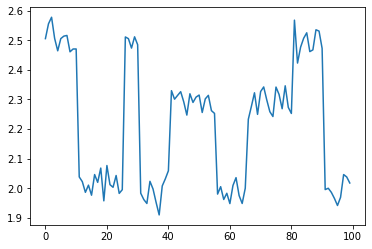

In [107]:
plt.plot( t, rhob_30['A'])


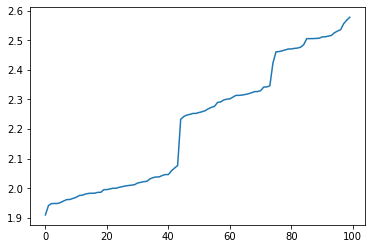

In [135]:
plt.plot( t, rhob_30_sort)

Уже тут видно, что 3 кластера - оптимальный выбор

In [109]:
X=pd.DataFrame(rhob_30_sort)

Text(0, 0.5, 'WCSS')

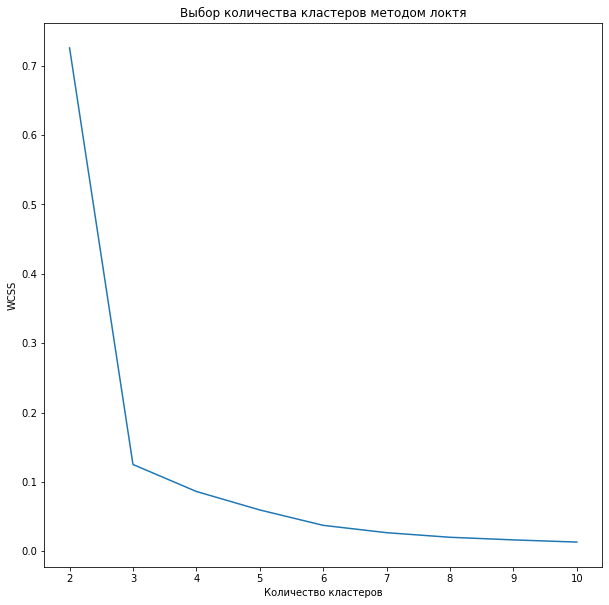

In [111]:
wcss = []

for i in range(2, 11):

    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)

    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

plt.figure(figsize = (10,10))

plt.plot(range(2, 11), wcss)

plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')

[[2.29236896]
 [1.9976967 ]
 [2.50005075]]


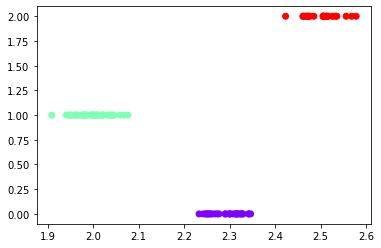

In [118]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_pred = kmeans.fit_predict(X)
print(kmeans.cluster_centers_)
plt.scatter(X[:], y_pred ,c=kmeans.labels_, cmap='rainbow')

Text(0, 0.5, 'Центры класстеров')

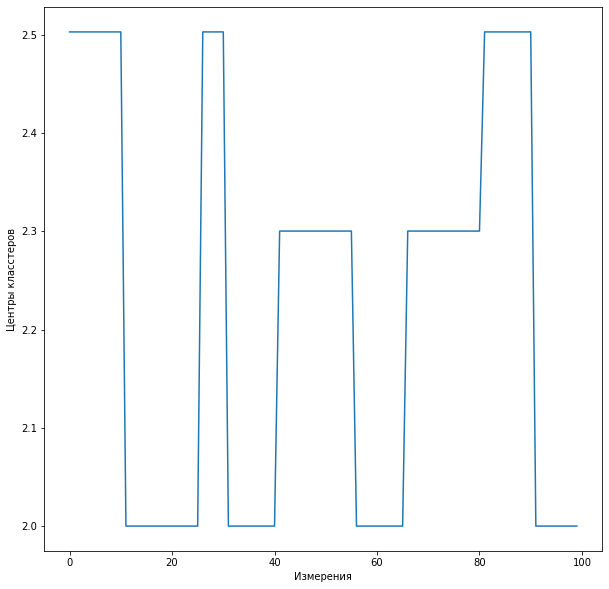

In [141]:
M=rhob_30['A']
def L_clust(x,y):
    z=[]
    for i in y:
        z.append(abs(abs(x)-abs(i)))
    f=z.index(min(z))
    return y[f]
S=[]
K=kmeans.cluster_centers_  
for i in M:
    S.append(L_clust(i,K))
#print(S)
plt.figure(figsize=(10,10))
plt.plot(S)
plt.xlabel("Измерения")
plt.ylabel("Центры класстеров")

### rhob_50

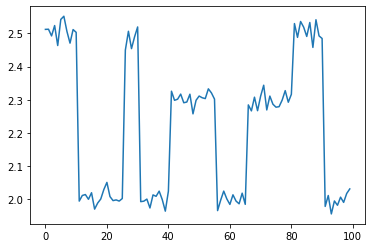

In [121]:
plt.plot( t, rhob_50['A'])

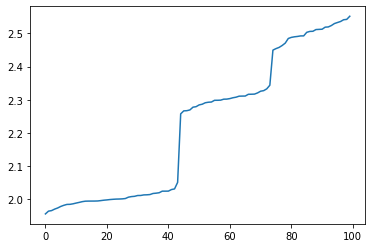

In [134]:
plt.plot( t, rhob_50_sort)

In [136]:
X=pd.DataFrame(rhob_50_sort)

Text(0, 0.5, 'WCSS')

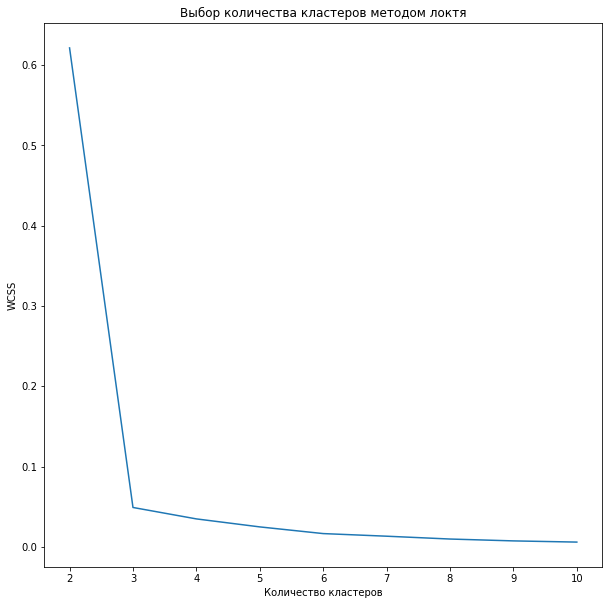

In [137]:
wcss = []
 
for i in range(2, 11):
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
 
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

plt.figure(figsize = (10,10))

plt.plot(range(2, 11), wcss)

plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')

[[2.30026709]
 [1.99996479]
 [2.50298394]]


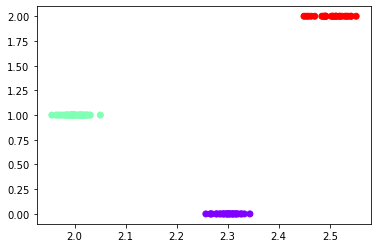

In [150]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_pred = kmeans.fit_predict(X)
print(kmeans.cluster_centers_)
plt.scatter( X[:], y_pred,  c=kmeans.labels_, cmap='rainbow')

Text(0, 0.5, 'Центры класстеров')

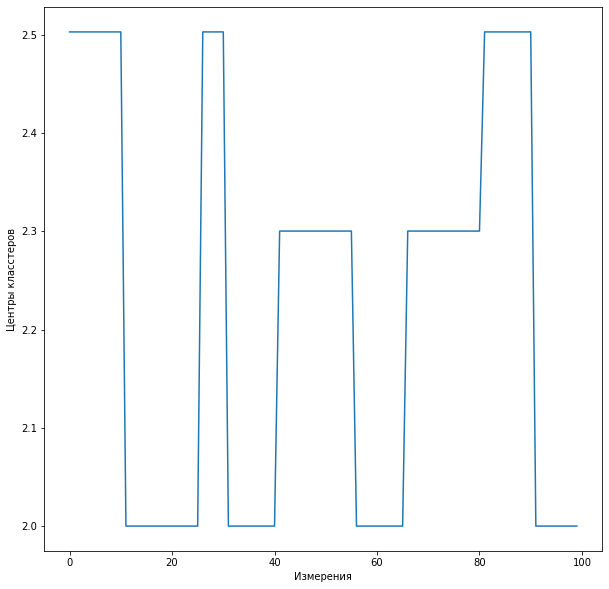

In [153]:
M=rhob_50['A']
def L_clust(x,y):
    z=[]
    for i in y:
        z.append(abs(abs(x)-abs(i)))
    f=z.index(min(z))
    return y[f]
S=[]
K=kmeans.cluster_centers_  
for i in M:
    S.append(L_clust(i,K))
#print(S)
plt.figure(figsize=(10,10))
plt.plot(S)
plt.xlabel("Измерения")
plt.ylabel("Центры класстеров")